## Genderdata

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('../data/train_users_2.csv')
df.replace('-unknown-', np.nan, inplace=True)
print df.shape

(213451, 16)


### Show how many age data are missing in pie chart

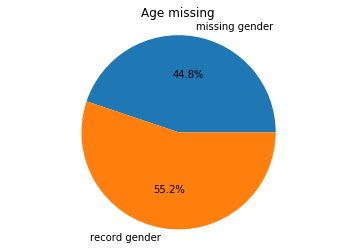

In [45]:

missing_gender_count = df.gender.isnull().sum()
record_gender_count = df.gender.shape[0] - missing_gender_count
var = [missing_gender_count, record_gender_count]
lable = ['missing gender', 'record gender']
fig1, ax1 = plt.subplots()
ax1.pie(var,labels = lable,autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Age missing')

### Train a modle to get the the missing age
relavent feature can be: date_account_created signup_method signup_flow language affiliate_channel affiliate_provider first_affiliate_tracked signup_app first_device_type first_browser

In [46]:
df.drop(['id'],1,inplace=True)


Delete the row has NaN data, split feature and lable

In [47]:

gender_relat_data = df.dropna()
Y = gender_relat_data.gender
gender_relat_data.drop(['gender','date_account_created','country_destination','date_first_booking'],1,inplace=True)


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
gender_relat_data.head()

,timestamp_first_active,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
2,2.010000e+13,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2.010000e+13,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
6,2.010000e+13,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,2.010000e+13,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,2.010000e+13,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari


One hot encoding all age related data

In [50]:
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(gender_relat_data.language, prefix="language")
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="language")
oh_affiliate_channel = pd.get_dummies(gender_relat_data.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(gender_relat_data.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(gender_relat_data.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(gender_relat_data.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(gender_relat_data.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(gender_relat_data.first_browser, prefix="first_browser")
gender_relat_data.drop(['signup_method', 'signup_method', 'signup_flow',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
gender_relat_data = pd.concat([oh_signup_method,gender_relat_data,oh_language,oh_signup_method,
                      oh_affiliate_channel,oh_affiliate_provider,
                     oh_first_affiliate_tracked,oh_signup_app,
                     oh_first_device_type,oh_first_browser],axis=1)

/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Train a model to predict age using SGDRegresion

In [51]:
gender_relat_data.head(1)

,language_basic,language_facebook,language_google,timestamp_first_active,age,language_ca,language_cs,language_da,language_de,language_el,...,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,1,0,0,2.010000e+13,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  classification to predict gender

In [52]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gender_relat_data, Y, test_size=0.3)
sgdc = linear_model.SGDClassifier(loss="log", penalty="l2")
sgdc.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [54]:
#calulate overall Scoring .
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
y_predict = sgdc.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.          0.          0.00273938]
7.50418607972e-06
0.00273937695101


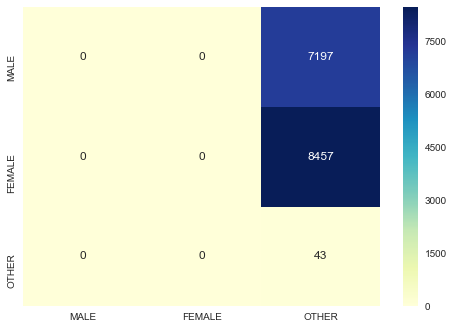

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
result_lable = ['MALE','FEMALE','OTHER']
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

In [57]:
gender_relat_data.shape

(52321, 109)

## DECISION TREE TO PREDICT GENDER

In [70]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=60)
clf = clf.fit(x_train,y_train)

In [71]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.57341125  0.51202356  0.        ]
0.543694493764
0.54946805122


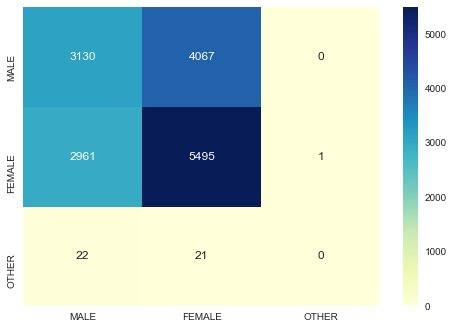

In [72]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

## Radial Basis Function (RBF) kernel SVM

In [74]:
from sklearn.svm import SVC
svc = SVC(gamma=2, C=1)
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
y_predict = svc.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.56833702  0.51679688  0.01111111]
0.543179656481
0.545136013251


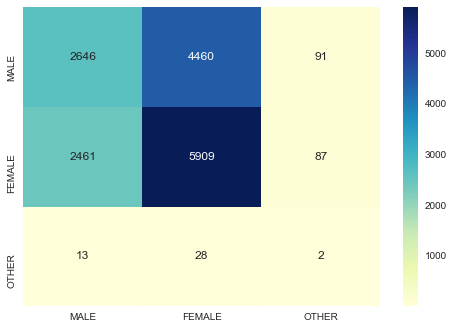

In [77]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")